# References
This file was originally taken from [AI Tourist on youtube](https://www.youtube.com/watch?v=sdp49vTanSk&list=PLDJWPpm6CX5l2-0z-StGTcwzTx5ZCEY0x&index=33)
- [blog](https://www.viralml.com/video-content.html?fm=yt&v=sdp49vTanSk)
The main difference here is that I get the Price of SPY from yahoo rather than loading my own csv, however I do plan on expanded on this even further from chatting with GPT and other AI's about this document.

In [1]:
!pip install yfinance

# Creating Two Markov Chains, One for Days with Volume Jumps, and another for Volume Drops

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

In [3]:
# load market data from Yahoo Finance (https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)

# gspc_df = pd.read_csv('^GSPC.csv')
# gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])

# cut_off_date = '2010-01-01' 
# gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date]


# gspc_df.head()
import yfinance as yf
import pandas as pd

# Download SPY data from Yahoo Finance
gspc_df = yf.download('SPY', start='2010-01-01')

# Reset the index to move the date from the index to a column
gspc_df = gspc_df.reset_index()

# Optional: If you want to start your index from a specific number, e.g., 15097
# First, reset the index to start from 0 as usual
gspc_df.reset_index(inplace=True)

# Then, adjust the index to start from your desired starting number
starting_index = 15097
gspc_df['index'] = gspc_df.index + starting_index

# Rename 'index' column to something more meaningful, if desired
gspc_df.rename(columns={'index': 'YourIndexName'}, inplace=True)

# Display the dataframe
print(gspc_df.head())


[*********************100%%**********************]  1 of 1 completed
   YourIndexName       Date        Open        High         Low       Close  \
0          15097 2010-01-04  112.370003  113.389999  111.510002  113.330002   
1          15098 2010-01-05  113.260002  113.680000  112.849998  113.629997   
2          15099 2010-01-06  113.519997  113.989998  113.430000  113.709999   
3          15100 2010-01-07  113.500000  114.330002  113.180000  114.190002   
4          15101 2010-01-08  113.889999  114.620003  113.660004  114.570000   

   Adj Close     Volume  
0  87.129944  118944600  
1  87.360580  111579900  
2  87.422112  116074400  
3  87.791115  131091100  
4  88.083290  126402800  


In [46]:
from random import randint
import pandas as pd

# Assuming gspc_df is your DataFrame and 'Date' is the index after resetting or fetching data
# If 'Date' is not a column, use the following adjustment

# Example adjustment if 'Date' is still an index
# Reset index to ensure 'Date' is a column if not already done
gspc_df = gspc_df.reset_index()

new_set = []
for row_set in range(0, 100000):
    if row_set % 2000 == 0:
        print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(gspc_df) - row_quant) #
    market_subset = gspc_df.iloc[row_start:row_start + row_quant]

    # Ensure 'Date' is treated correctly
    Close_Date = max(market_subset['Date'])  # This works if 'Date' is a column
    if row_set % 2000 == 0:
        print(Close_Date)

    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change()
    Volume_Gap = market_subset['Volume'].pct_change()
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])

    new_set.append(pd.DataFrame({
        'Sequence_ID': [row_set] * len(market_subset),
        'Close_Date': [Close_Date] * len(market_subset),
        'Close_Gap': Close_Gap,
        'High_Gap': High_Gap,
        'Low_Gap': Low_Gap,
        'Volume_Gap': Volume_Gap,
        'Daily_Change': Daily_Change,
        'Outcome_Next_Day_Direction': Outcome_Next_Day_Direction
    }))

# Example of how to concatenate the list of DataFrames into one DataFrame
final_df = pd.concat(new_set, ignore_index=True)

# Checking the first few rows of the final DataFrame
print(final_df.head())


0
2010-03-01 00:00:00
2000
2013-10-04 00:00:00
4000
2014-06-06 00:00:00
6000
2021-02-11 00:00:00
8000
2012-01-25 00:00:00
10000
2019-02-04 00:00:00
12000
2010-12-20 00:00:00
14000
2014-07-28 00:00:00
16000
2023-11-03 00:00:00
18000
2022-01-11 00:00:00
20000
2016-09-20 00:00:00
22000
2015-05-11 00:00:00
24000
2010-12-02 00:00:00
26000
2017-10-20 00:00:00
28000
2020-02-25 00:00:00
30000
2018-01-24 00:00:00
32000
2019-05-13 00:00:00
34000
2014-08-20 00:00:00
36000
2012-11-19 00:00:00
38000
2022-07-12 00:00:00
40000
2011-06-21 00:00:00
42000
2018-05-03 00:00:00
44000
2018-07-23 00:00:00
46000
2019-08-29 00:00:00
48000
2020-07-08 00:00:00
50000
2010-04-30 00:00:00
52000
2022-03-29 00:00:00
54000
2015-07-24 00:00:00
56000
2011-08-11 00:00:00
58000
2018-08-23 00:00:00
60000
2011-11-14 00:00:00
62000
2023-05-18 00:00:00
64000
2018-05-25 00:00:00
66000
2023-07-14 00:00:00
68000
2018-07-09 00:00:00
70000
2023-02-28 00:00:00
72000
2013-12-09 00:00:00
74000
2012-12-27 00:00:00
76000
2021-04-28 00:

In [47]:
len(market_subset)

24

In [48]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(2001906, 8)
(1801906, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
3514,99999,2024-01-19,0.006081,0.004102,0.005448,-0.207651,0.004889,47159200.0
3515,99999,2024-01-19,-0.013857,0.002063,-0.009800,0.845726,-0.012026,-16253500.0
3516,99999,2024-01-19,0.009482,-0.006136,0.002180,-0.157922,0.002907,-19540900.0
3517,99999,2024-01-19,0.002010,0.005074,0.006100,-0.225470,-0.000443,-11739600.0
3518,99999,2024-01-19,0.004223,0.002524,0.004855,-0.174887,0.003333,12613300.0
3519,99999,2024-01-19,0.001808,0.000168,0.001899,0.227730,0.002251,9157800.0
3520,99999,2024-01-19,0.000378,0.001867,0.002885,0.134673,-0.000398,45076000.0
3521,99999,2024-01-19,-0.002895,-0.001089,-0.006215,0.584203,-0.002476,1389600.0
3522,99999,2024-01-19,-0.005596,-0.007044,-0.005937,0.011368,0.001038,-20037800.0
3523,99999,2024-01-19,-0.008167,-0.005236,-0.004931,-0.162087,-0.003486,-19353700.0


In [49]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
26,0,2010-03-01,-0.001959,-0.005086,-0.001506,-0.288049,-0.000374,-16919900.0
27,0,2010-03-01,0.010466,0.006041,0.001319,-0.070350,0.011790,81030500.0
28,0,2010-03-01,-0.000832,-0.001386,0.002447,0.362404,0.009814,-145304600.0
29,0,2010-03-01,0.015735,0.016189,0.012299,-0.477000,0.008084,9527600.0
30,0,2010-03-01,0.004739,0.005098,0.017807,0.059803,-0.000091,24863500.0


In [50]:
# confirm sequence
# new_set_df[new_set_df['Close_Date'] == '1973-06-27'] {HLH, HLH, HHH, HHH, LLL, LML, LML, LLL, LHL, ...	
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)
 

In [51]:
new_set_df.tail(10)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
3524,99999,2024-01-19,L,L,L,1828600.0,LLL
3525,99999,2024-01-19,M,M,M,-11181700.0,MMM
3526,99999,2024-01-19,H,L,H,-8947700.0,HLH
3527,99999,2024-01-19,M,M,H,1379200.0,MMH
3528,99999,2024-01-19,H,M,H,10630100.0,HMH
3529,99999,2024-01-19,M,H,L,-19996700.0,MHL
3530,99999,2024-01-19,M,L,L,27070900.0,MLL
3531,99999,2024-01-19,L,H,M,-16171000.0,LHM
3532,99999,2024-01-19,L,L,M,23012300.0,LLM
3533,99999,2024-01-19,H,H,H,18877100.0,HHH


In [52]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count    1.801906e+06
mean    -5.450135e+04
std      4.229971e+07
min     -2.694189e+08
25%     -2.016230e+07
50%     -5.023000e+05
75%      1.880800e+07
max      3.183834e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [53]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2010-03-01,"{LLM, HMH, MHH, HLH, HMM, HHH, MHH, MLL, LHL, ..."
1,1,2023-04-28,"{HLH, HMH, LHL, MML, HMH, MLL, LLM, HHH, HMM, ..."
2,2,2011-03-31,"{MLH, HMH, LHL, LLL, HLH, MMM, LHL, HLH, LMM, ..."
3,3,2021-07-19,"{HMM, MHM, MMM, MLM, MHM, HLH, HMH, MHL, MMM, ..."
4,4,2022-09-28,"{LHL, HLM, LML, LHH, HLH, LML, LHL, LLL, LHL, ..."


In [54]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Close_Date,Outcome_Next_Day_Direction
count,100000.000000,100000,1.000000e+05
mean,49999.500000,2017-02-01 18:28:43.680000,-5.728706e+04
min,0.000000,2010-01-19 00:00:00,-4.843960e+07
25%,24999.750000,2013-07-29 00:00:00,-1.782391e+06
50%,49999.500000,2017-02-07 00:00:00,-1.194178e+05
75%,74999.250000,2020-08-06 00:00:00,1.533549e+06
max,99999.000000,2024-02-07 00:00:00,6.373610e+07
std,28867.657797,NaN,4.439224e+06


In [55]:

compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()
    

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2010-03-01,"{LLM, HMH, MHH, HLH, HMM, HHH, MHH, MLL, LHL, ...",-7.733483e+06
1,1,2023-04-28,"{HLH, HMH, LHL, MML, HMH, MLL, LLM, HHH, HMM, ...",-1.328643e+05
2,2,2011-03-31,"{MLH, HMH, LHL, LLL, HLH, MMM, LHL, HLH, LMM, ...",-3.225729e+06
3,3,2021-07-19,"{HMM, MHM, MMM, MLM, MHM, HLH, HMH, MHL, MMM, ...",6.429794e+06
4,4,2022-09-28,"{LHL, HLM, LML, LHH, HLH, LML, LHL, LLL, LHL, ...",-1.104082e+06


In [56]:
# # reduce set 

# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2010-03-01,"LLM,HMH,MHH,HLH,HMM,HHH,MHH,MLL,LHL,HLH,MHH,MLM",-7.733483e+06
1,1,2023-04-28,"HLH,HMH,LHL,MML,HMH,MLL,LLM,HHH,HMM,HHH,HLH,LM...",-1.328643e+05
2,2,2011-03-31,"MLH,HMH,LHL,LLL,HLH,MMM,LHL,HLH,LMM,LHH,LHL,HL...",-3.225729e+06
3,3,2021-07-19,"HMM,MHM,MMM,MLM,MHM,HLH,HMH,MHL,MMM,LHH,HLH,ML...",6.429794e+06
4,4,2022-09-28,"LHL,HLM,LML,LHH,HLH,LML,LHL,LLL,LHL,LLL,LHL",-1.104082e+06


In [57]:
# use last x days of data for validation
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(1669, 4)

In [58]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(98331, 4)

In [59]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [60]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [61]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    9.833100e+04
mean    -5.484823e+04
std      4.468383e+06
min     -4.843960e+07
25%     -1.791572e+06
50%     -1.190000e+05
75%      1.548943e+06
max      6.373610e+07
Name: Outcome_Next_Day_Direction, dtype: float64

In [62]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

98331


3874

In [63]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))    

all moves: 98331
big moves only: 3874


In [64]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
23,23,"LLH,MML,LHL,LHL,HLH,HLH,HHL,LML,HML,LML",1
50,50,"LHM,MHM,HLM,MLM,MHM,LMM,LHL,HLH",1
68,68,"MLH,LHL,HLH,LHL,LHL,LML,HLL,LMM,HHH,LHL,LML,HL...",1
73,73,"HLH,LML,LHL,MML,LML,LMM,LHL,HMH,LLL,MHH",1
136,136,"LHH,MLH,HLM,HLH,HHH,LML,HMM,HLH,MLM,HHH,MHL,HL...",0


In [65]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(2116, 2)
(1758, 2)


In [66]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [67]:
compressed_set['Outcome_Next_Day_Direction'].head() 

23     1
50     1
68     1
73     1
136    0
Name: Outcome_Next_Day_Direction, dtype: int32

# Build the markov transition grid

In [68]:
def build_transition_grid(compressed_grid, unique_patterns):
    patterns = []
    counts = []
    for from_event in unique_patterns:
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event  # Example: 'MMM,MlM'

            # Search for matches in the compressed grid
            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # Create to/from grid
    grid_Df = pd.DataFrame({'pairs': patterns, 'counts': counts})

    # Correctly split 'pairs' into 'x' and 'y'
    split_columns = grid_Df['pairs'].str.split(',', expand=True)
    grid_Df['x'] = split_columns[0]
    grid_Df['y'] = split_columns[1]

    # Pivot to create the transition grid
    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    # Clean up columns and index
    # Clean up columns and index
    grid_Df.columns = [col for col in grid_Df.columns]
    grid_Df.index.name = None  # Set the index name to None instead of deleting it


    # Replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)

    # Normalize rows to sum to 1
    grid_Df = grid_Df.div(grid_Df.sum(axis=1), axis=0)

    return grid_Df


In [69]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

In [70]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.000000,0.000000,0.000000,0.252454,0.000000,0.010905,0.071974,0.000000,0.049073,0.000000,...,0.025627,0.036532,0.021265,0.000000,0.033261,0.016903,0.132497,0.024537,0.037077,0.004907
HHL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304636,0.000000,0.000000,0.000000
HHM,0.000000,0.000000,0.000000,0.170157,0.000000,0.013089,0.062827,0.000000,0.000000,0.018325,...,0.000000,0.000000,0.000000,0.010471,0.031414,0.086387,0.125654,0.000000,0.002618,0.041885
HLH,0.095842,0.006488,0.031554,0.044235,0.042465,0.005898,0.070481,0.002654,0.028310,0.000885,...,0.006783,0.045709,0.000295,0.000590,0.054556,0.019168,0.030080,0.020643,0.052197,0.057505
HLL,0.036885,0.000000,0.000000,0.795082,0.000000,0.000000,0.004098,0.000000,0.000000,0.000000,...,0.081967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.006400,0.000000,0.000000,0.013600,0.000000,0.007200,0.058400,0.0224,0.000000,0.000000,...,0.000000,0.000000,0.00480,0.012000,0.023200,0.009600,0.173600,0.014400,0.004000,0.106400
HHL,0.019231,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000
HHM,0.000000,0.000000,0.000000,0.196507,0.000000,0.000000,0.135371,0.0000,0.000000,0.240175,...,0.013100,0.000000,0.00000,0.017467,0.000000,0.000000,0.069869,0.017467,0.082969,0.052402
HLH,0.036970,0.005799,0.003262,0.005799,0.011961,0.046394,0.024647,0.0000,0.041319,0.000000,...,0.022834,0.012323,0.03842,0.007974,0.037332,0.073577,0.043132,0.031896,0.002537,0.054730
HLL,0.000000,0.000000,0.000000,0.183784,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.416216,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205405,0.194595


In [72]:
# compressed_set_validation[compressed_set_validation['Sequence_ID' == seq_id]]
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 1
0.8834918463621682
-1.0836701512798466
outcome: 1
0.1570021709228881
-7.189442714721376
outcome: 0
1.1984924016133431
7.622929613312574
outcome: 1
1.367024291029084
2.365140622230707
outcome: 1
1.059344707126533
4.082707711794064
outcome: 0
0.7475895849639075
5.7308124320615645
outcome: 1
1.0994998349471912
6.458479451375122
outcome: 1
0.9114654407562234
4.076947002520335
outcome: 0
0.7249618370224341
5.1575147104958425
outcome: 1
0.7541736230404364
-1.8994871836398786
outcome: 1
0.5331324006500623
-10.311492128401106
outcome: 1
0.3931777509562402
-5.675982055224207
outcome: 1
0.5078356590446322
-7.489551113599535
outcome: 0
0.9979146383362396
-0.11393214476491592
outcome: 0
0.4655147678128266
1.8633364530454983
outcome: 1
0.35492725127428
-5.6265189013837364
outcome: 1
1.3290148281186394
0.6067180782375694
outcome: 1
1.2577098828263975
9.641106017469719
outcome: 0
0.6806109208445309
-11.973116473138706
outcome: 1
0.8186758257284422
-7.2311785282816174
outcome: 1
0.634956590

outcome: 0
1.1128757618515959
0.9723868420544528
outcome: 0
1.30471322297633
1.5339371897891478
outcome: 1
0.4153667219443903
-22.214702077435994
outcome: 1
0.979169764846812
3.526104667421856
outcome: 0
0.69696092425824
-1.7279043802247798
outcome: 1
0.9496345057518087
2.783361102973652
outcome: 0
0.5445839381495501
3.9355500810707373
outcome: 1
1.1992549197229052
-0.13034473398977875
outcome: 1
0.7258233162058141
4.640241711315498
outcome: 0
1.0474130760929872
-1.0792463433904542
outcome: 1
1.0303863128947752
11.893193033792768
outcome: 1
0.8834918463621682
-1.0836701512798466
outcome: 1
0.9172559862382649
10.538415178874052
outcome: 1
0.9166543584169616
-13.07508784226921
outcome: 0
0.986651330200517
-2.6990106607636286
outcome: 1
0.40087291791105933
-19.40156357781136
outcome: 1
1.0763663313762324
2.9513762389514473
outcome: 1
1.1610674810445674
6.007038140462702
outcome: 1
1.2542216401147572
10.488278978628767
outcome: 1
0.3832987535851592
-11.235099200338933
outcome: 0
0.60827870

outcome: 0
0.4360958582839633
-8.791344807953834
outcome: 0
0.9748719636595173
3.25641890557455
outcome: 1
1.1784155574472321
8.173771948411051
outcome: 0
1.2448949099509838
0.8093596129101224
outcome: 1
0.9496345057518087
2.783361102973652
outcome: 1
0.546471889376412
-4.442035828635074
outcome: 1
1.3054634366277797
4.101100932597375
outcome: 0
0.9998284802761985
5.300919038039074
outcome: 1
0.3832987535851592
-11.235099200338933
outcome: 0
0.9864497297754602
-0.4743393925005268
outcome: 0
0.9715763171722556
16.72208412146304
outcome: 0
0.45395731609918466
-19.05337550770943
outcome: 0
0.9998284802761985
5.300919038039074
outcome: 1
1.204470364024489
0.2506399427315573
outcome: 1
0.8805273123890828
9.71856620755253
outcome: 0
1.3029219435676187
2.178643426654063
outcome: 1
0.7541736230404364
-1.8994871836398786
outcome: 0
0.40860011855676914
-20.846572932281752
outcome: 0
1.1413558328918234
-0.8351244751749873
outcome: 0
0.8098831634957641
-3.5805951527004543
outcome: 0
0.575304785938

outcome: 1
1.1509950496882557
1.0949021849265907
outcome: 0
1.3063854826715444
2.559628103375399
outcome: 0
0.9642276258976591
-1.4709872116300393
outcome: 1
1.2488552547235203
0.6194116994020646
outcome: 1
1.0979398651233288
1.0436282685711316
outcome: 0
0.7235365749494024
3.4830533673612565
outcome: 0
0.6020854205426005
7.299195372609476
outcome: 0
1.0080187243370076
1.128877930045034
outcome: 0
1.3029219435676187
2.178643426654063
outcome: 1
1.3052987373336695
27.946422184989466
outcome: 1
0.8810860622354333
7.603852421502859
outcome: 0
0.5666324815381414
-6.274160244657022
outcome: 0
1.2787816390827287
3.0456437307976802
outcome: 0
1.0521063513399254
0.490837745759106
outcome: 1
0.5368874106194239
-10.238943147956757
outcome: 1
1.0848224353261775
-0.7750509708546938
outcome: 0
0.6418757195704011
9.380854765538004
outcome: 0
1.451333510106513
4.364712476671188
outcome: 1
0.7805330217079216
5.715847723436401
outcome: 0
1.2233953699152535
-0.07407945510088243
outcome: 0
0.366142545564

outcome: 0
0.6261250768773285
-9.688139595920127
outcome: 0
1.0558951470304736
-1.0777644200205116
outcome: 1
1.0098922185045376
3.8930477745523384
outcome: 1
0.546471889376412
-4.442035828635074
outcome: 1
0.7940533288830134
-3.6285821762512245
outcome: 1
1.1400174642663206
17.157795554063277
outcome: 0
1.066860988796434
-1.1068269953512027
outcome: 1
0.9941819218824466
-2.2434469756868207
outcome: 1
0.7781934780218333
-12.98795123474556
outcome: 1
0.8611541655314804
-1.934193457091021
outcome: 1
1.0804926064741636
3.0008393927919172
outcome: 1
1.2577098828263975
9.641106017469719
outcome: 1
0.3954727449375464
-22.00571541851808
outcome: 0
1.0397725157718902
-1.4095115804307223
outcome: 0
1.1984924016133431
7.622929613312574
outcome: 1
0.5432146578117489
-3.220950948582068
outcome: 0
1.0754830135310656
14.810606940227485
outcome: 0
0.7705516725585293
-5.9305418603281765
outcome: 1
1.0655695769081994
3.703988616259923
outcome: 0
0.8030534909822141
-11.312379994152804
outcome: 0
0.83587

outcome: 1
0.9119559546688393
-5.947598518713008
outcome: 1
1.0662109799735908
3.3422054394538603
outcome: 1
1.1039541722024035
3.4625857131523934
outcome: 1
0.9938423514468283
-3.661312474456647
outcome: 0
0.618829420558592
-4.159559943509944
outcome: 0
0.9673162792494343
9.952448799296754
outcome: 0
0.69696092425824
-1.7279043802247798
outcome: 1
1.0098922185045376
3.8930477745523384
outcome: 0
1.2495659257233402
10.784033611879579
outcome: 1
1.0620633664820478
-1.484561069788054
outcome: 0
0.8098831634957641
-3.5805951527004543
outcome: 1
0.9309443954919422
10.898822426609664
outcome: 1
1.0394525065976816
1.8728492213352639
outcome: 0
0.4709565181073845
-8.526926438013412
outcome: 1
0.48360180390245205
-22.251314421869626
outcome: 0
0.6722576235110815
-4.242768567481944
outcome: 1
1.2310747657481482
20.09981111492371
outcome: 1
0.5191865859266229
8.471919320747356
outcome: 1
0.8353509453727523
7.265171313307076
outcome: 1
1.363858426303205
2.8590709205335627
outcome: 0
1.16096471938

array([[446, 457],
       [296, 470]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 54.88 %


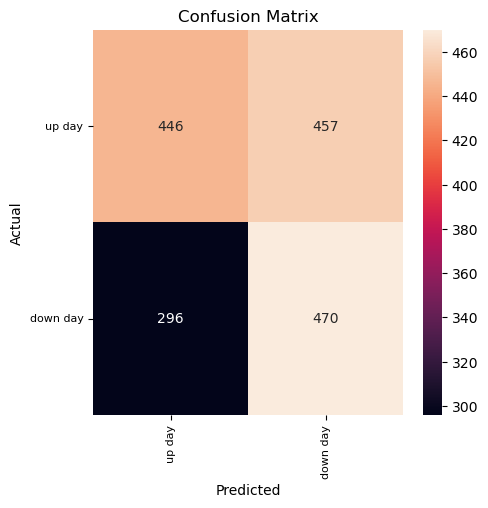

In [74]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()